## 1. Sorting categories into sectors and creating indexes with rounds

Previously, there were 858 categories of companies in the main dataset. To reduce the complexity of this data, we manually assigned each category into sectors defined by Global Industry Classification Standard (GICS). This notebook replaces these categories into these sectors

In [ ]:
import pandas as pd
import numpy as np
import ast
import json

def drop_dupes(x):
    """this function removes duplicates"""
    return list(dict.fromkeys(x))

# reads the csv from the manually edited categories to sectors
categories = pd.read_csv("params/company_categories.csv", header=None)

# creates the dictionary from the csv
sectors = categories.set_index(0).to_dict()[1]

# reads the rounds_training dataset
rounds = pd.read_csv("splitted data/rounds_training.csv")
rounds_testing = pd.read_csv("splitted data/rounds_testing.csv")

In [ ]:
# drops NaNs from the category list
rounds = rounds[rounds['company_category_list'].notna()]
rounds_testing = rounds_testing[rounds_testing['company_category_list'].notna()]
# resets the index
rounds = rounds.reset_index(drop=True)
rounds_testing = rounds_testing.reset_index(drop=True)

# new category list so it can be split
category_list = rounds['company_category_list']
category_list_testing = rounds_testing['company_category_list']

In [ ]:
# splits the data into individual categories in a list of lists
categories_list = category_list.tolist()
categories = []
for i in range(len(categories_list)):
    if "|" in str(categories_list[i]):
        categories.append(categories_list[i].split('|')) # splits the categories in that row 
    else:
        categories.append([categories_list[i]]) # makes sure that all the types are consistent, i.e. a list. 

# splits the data into individual categories in a list of lists
categories_list_testing = category_list_testing.tolist()
categories_testing = []
for i in range(len(categories_list_testing)):
    if "|" in str(categories_list_testing[i]):
        categories_testing.append(categories_list_testing[i].split('|')) # splits the categories in that row 
    else:
        categories_testing.append([categories_list_testing[i]]) # makes sure that all the types are consistent, i.e. a list. 

In [ ]:
# drops the original category list
rounds.drop(columns='company_category_list',inplace=True)
rounds_testing.drop(columns='company_category_list',inplace=True)
# makes a new category list from the split one
rounds['company_category_list'] = categories
rounds_testing['company_category_list'] = categories_testing

In [ ]:
# changes categories into sectors
company_sector = rounds['company_category_list'].apply(lambda x: [sectors[x[i]] for i in range(len(x))])
company_sector_testing = rounds_testing['company_category_list'].apply(lambda x: [sectors[x[i]] for i in range(len(x))])


In [ ]:
# removes duplicates from the sectors
no_dupes_company_sector = company_sector.apply(lambda x: drop_dupes(x))
no_dupes_company_sector_testing = company_sector_testing.apply(lambda x: drop_dupes(x))

In [ ]:
# applies back the company sector list to the main dataframe
rounds['company_sector'] = no_dupes_company_sector
rounds_testing['company_sector'] = no_dupes_company_sector_testing

In [ ]:
sectors_list = no_dupes_company_sector
sectors_list_testing = no_dupes_company_sector_testing

from sklearn.preprocessing import MultiLabelBinarizer
import pickle

mlb = MultiLabelBinarizer()
mlb_testing = MultiLabelBinarizer()

binarized_sectors = mlb.fit_transform(sectors_list)
binarized_sectors_testing = mlb_testing.fit_transform(sectors_list_testing)

binarized_sectors_column_names = mlb.classes_
binarized_sectors_column_names_testing = mlb_testing.classes_

pickle.dump(mlb, open('model objects/sectors_binarizer.pkl', 'wb'))

overall_categories = pd.DataFrame(data=binarized_sectors,columns=binarized_sectors_column_names)
overall_categories_testing = pd.DataFrame(data=binarized_sectors_testing,columns=binarized_sectors_column_names_testing)

In [ ]:
final = pd.concat([rounds, overall_categories], axis=1)
final_testing = pd.concat([rounds_testing, overall_categories_testing], axis=1)

In [ ]:
def parse_tuple(string):
    try:
        s = ast.literal_eval(str(string))
        if type(s) == tuple:
            return s
        return
    except:
        return

### 1.1 "Communication Services" index

In [ ]:
# creating indexes for each round in each sector
sector1_temp = final[final['Communication Services']==1]
Communication_Services = sector1_temp.groupby(['Communication Services', 'funding_round']).agg({'raised_amount_usd': 'mean'})
Communication_Services['raised_amount_usd'] = Communication_Services['raised_amount_usd'].fillna(0)
Communication_Services['sector_index'] = pd.qcut(Communication_Services['raised_amount_usd'], q = 10, labels=['1','2','3','4','5','6','7','8','9','10'])

Communication_Services['sector_index'].to_json('sectors json/sector_rounds_communication_services.json')

### 1.2. "Consumer&nbsp;Discretionary" index

In [ ]:
sector2_temp = final[final['Consumer Discretionary']==1]
Consumer_Discretionary = sector2_temp.groupby(['Consumer Discretionary', 'funding_round']).agg({'raised_amount_usd': 'mean'})
Consumer_Discretionary['raised_amount_usd'] = Consumer_Discretionary['raised_amount_usd'].fillna(0)
Consumer_Discretionary['sector_index'] = pd.qcut(Consumer_Discretionary['raised_amount_usd'], q = 10, labels=['1','2','3','4','5','6','7','8','9','10'])

Consumer_Discretionary['sector_index'].to_json('sectors json/sector_rounds_consumer_discretionary.json')


### 1.3. "Consumer Staples" index

In [ ]:
sector3_temp = final[final['Consumer Staples']==1]
Consumer_Staples = sector3_temp.groupby(['Consumer Staples', 'funding_round']).agg({'raised_amount_usd': 'mean'})
Consumer_Staples['raised_amount_usd'] = Consumer_Staples['raised_amount_usd'].fillna(0)
Consumer_Staples['sector_index'] = pd.qcut(Consumer_Staples['raised_amount_usd'], q = 10, labels=['1','2','3','4','5','6','7','8','9','10'])

Consumer_Staples['sector_index'].to_json('sectors json/sector_rounds_consumer_staples.json')

### 1.4. "Energy" index

In [ ]:
sector4_temp = final[final['Energy']==1]
Energy = sector4_temp.groupby(['Energy', 'funding_round']).agg({'raised_amount_usd': 'mean'})
Energy['raised_amount_usd'] = Energy['raised_amount_usd'].fillna(0)
Energy['sector_index'] = pd.qcut(Energy['raised_amount_usd'], q = 10, labels=['1','2','3','4','5','6','7','8','9','10'])

Energy['sector_index'].to_json('sectors json/sector_rounds_energy.json')

### 1.5. "Financials" index

In [ ]:
sector5_temp = final[final['Financials']==1]
Financials = sector5_temp.groupby(['Financials', 'funding_round']).agg({'raised_amount_usd': 'mean'})
Financials['raised_amount_usd'] = Financials['raised_amount_usd'].fillna(0)
Financials['sector_index'] = pd.qcut(Financials['raised_amount_usd'], q = 10, labels=['1','2','3','4','5','6','7','8','9','10'])

Financials['sector_index'].to_json('sectors json/sector_rounds_financials.json')


### 1.6. "Health Care" index

In [ ]:
sector6_temp = final[final['Health Care']==1]
Health_Care = sector6_temp.groupby(['Health Care', 'funding_round']).agg({'raised_amount_usd': 'mean'})
Health_Care['raised_amount_usd'] = Health_Care['raised_amount_usd'].fillna(0)
Health_Care['sector_index'] = pd.qcut(Health_Care['raised_amount_usd'], q = 10, labels=['1','2','3','4','5','6','7','8','9','10'])

Health_Care['sector_index'].to_json('sectors json/sector_rounds_health_care.json')

### 1.7. "Industrials" index

In [ ]:
sector7_temp = final[final['Industrials']==1]
Industrials = sector7_temp.groupby(['Industrials', 'funding_round']).agg({'raised_amount_usd': 'mean'})
Industrials['raised_amount_usd'] = Industrials['raised_amount_usd'].fillna(0)
Industrials['sector_index'] = pd.qcut(Industrials['raised_amount_usd'], q = 10, labels=['1','2','3','4','5','6','7','8','9','10'])

Industrials['sector_index'].to_json('sectors json/sector_rounds_industrials.json')


### 1.8. "Information Technology" index

In [ ]:
sector8_temp = final[final['Information Technology']==1]
Information_Technology = sector8_temp.groupby(['Information Technology', 'funding_round']).agg({'raised_amount_usd': 'mean'})
Information_Technology['raised_amount_usd'] = Information_Technology['raised_amount_usd'].fillna(0)
Information_Technology['sector_index'] = pd.qcut(Information_Technology['raised_amount_usd'], q = 10, labels=['1','2','3','4','5','6','7','8','9','10'])

Information_Technology['sector_index'].to_json('sectors json/sector_rounds_information_technology.json')

### 1.9. "Materials" index

In [ ]:
sector9_temp = final[final['Materials']==1]
Materials = sector9_temp.groupby(['Materials', 'funding_round']).agg({'raised_amount_usd': 'mean'})
Materials['raised_amount_usd'] = Materials['raised_amount_usd'].fillna(0)
Materials['sector_index'] = pd.qcut(Materials['raised_amount_usd'], q = 10, labels=['1','2','3','4','5','6','7','8','9','10'])

Materials['sector_index'].to_json('sectors json/sector_rounds_materials.json')


### 1.10. "Real Estate" index 

In [ ]:
sector10_temp = final[final['Real Estate']==1]
Real_Estate = sector10_temp.groupby(['Real Estate', 'funding_round']).agg({'raised_amount_usd': 'mean'})
Real_Estate['raised_amount_usd'] = Real_Estate['raised_amount_usd'].fillna(0)
Real_Estate['sector_index'] = pd.qcut(Real_Estate['raised_amount_usd'], q = 10, labels=['1','2','3','4','5','6','7','8','9','10'])

Real_Estate['sector_index'].to_json('sectors json/sector_rounds_real_estate.json')

### 1.11. "Utilities" index

In [ ]:
sector11_temp = final[final['Utilities']==1]
Utilities = sector11_temp.groupby(['Utilities', 'funding_round']).agg({'raised_amount_usd': 'mean'})
Utilities['raised_amount_usd'] = Utilities['raised_amount_usd'].fillna(0)
Utilities['sector_index'] = pd.qcut(Utilities['raised_amount_usd'], q = 10, labels=['1','2','3','4','5','6','7','8','9','10'])

Utilities['sector_index'].to_json('sectors json/sector_rounds_utilities.json')

## 2. Creating investor and startup company country name grouping dictionary

### 2.1. investor_country_name_grouping.json

In [ ]:
#investor countries
df = pd.read_csv('splitted data/investments_training.csv')
df.drop(df.columns.difference(['funding_round','new_raised_amount_usd','investor_country_code']), 1, inplace=True)
# drop NaNs
df.dropna(inplace=True)

In [ ]:
# Groups investor countries having less observations, renames with OTHER
country_counts = df['investor_country_code'].value_counts().to_frame()
country_counts['cumulative_counts'] = country_counts['investor_country_code'].cumsum()
country_counts['cumulative_percentage'] = country_counts['cumulative_counts'] / country_counts['cumulative_counts'].tail(1).values
country_counts['rn'] = np.arange(1,len(country_counts)+1)
country_counts['rn_percentage'] = country_counts['rn'] / country_counts['rn'].tail(1).values
country_counts.reset_index(inplace = True)
country_counts

,index,investor_country_code,cumulative_counts,cumulative_percentage,rn,rn_percentage
0,USA,68050,68050,0.711463,1,0.010638
1,GBR,5307,73357,0.766948,2,0.021277
2,FRA,2228,75585,0.790241,3,0.031915
3,CAN,2114,77699,0.812343,4,0.042553
4,DEU,1788,79487,0.831037,5,0.053191
...,...,...,...,...,...,...
89,TGO,1,95644,0.999958,90,0.957447
90,BGD,1,95645,0.999969,91,0.968085
91,GTM,1,95646,0.999979,92,0.978723
92,KHM,1,95647,0.999990,93,0.989362


<AxesSubplot:xlabel='cumulative_percentage', ylabel='rn_percentage'>

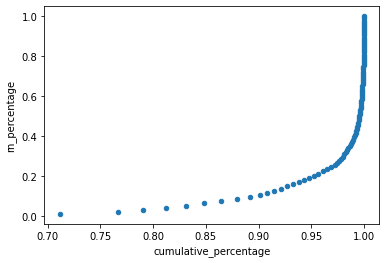

In [ ]:
country_counts.plot.scatter(x = 'cumulative_percentage', y = 'rn_percentage')

In [ ]:
country_counts['investor_country_name_new'] = country_counts.apply(lambda x: x['index'] if x['cumulative_percentage']<0.99 else 'OTHER', axis = 1)
country_counts = country_counts[['index','investor_country_name_new']]
country_counts.index = country_counts['index']
del country_counts['index']
country_counts

country_counts.to_json('params/investor_country_name_grouping.json')

### 2.2. startup_country_name_grouping.json

In [ ]:
#startup company countries
df = pd.read_csv('splitted data/investments_training.csv')
df.drop(df.columns.difference(['funding_round','new_raised_amount_usd','company_country_code']), 1, inplace=True)
# drop NaNs
df.dropna(inplace=True)

In [ ]:
# Groups startup company countries having less observations, renames with OTHER
country_counts = df['company_country_code'].value_counts().to_frame()
country_counts['cumulative_counts'] = country_counts['company_country_code'].cumsum()
country_counts['cumulative_percentage'] = country_counts['cumulative_counts'] / country_counts['cumulative_counts'].tail(1).values
country_counts['rn'] = np.arange(1,len(country_counts)+1)
country_counts['rn_percentage'] = country_counts['rn'] / country_counts['rn'].tail(1).values
country_counts.reset_index(inplace = True)
country_counts

,index,company_country_code,cumulative_counts,cumulative_percentage,rn,rn_percentage
0,USA,81051,81051,0.728417,1,0.008850
1,GBR,6065,87116,0.782924,2,0.017699
2,CAN,2851,89967,0.808547,3,0.026549
3,CHN,2227,92194,0.828561,4,0.035398
4,FRA,2006,94200,0.846589,5,0.044248
...,...,...,...,...,...,...
108,MKD,1,111266,0.999964,109,0.964602
109,BHR,1,111267,0.999973,110,0.973451
110,TGO,1,111268,0.999982,111,0.982301
111,TUN,1,111269,0.999991,112,0.991150


<AxesSubplot:xlabel='cumulative_percentage', ylabel='rn_percentage'>

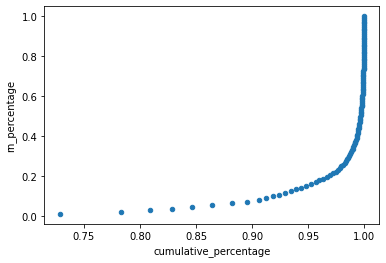

In [ ]:
country_counts.plot.scatter(x = 'cumulative_percentage', y = 'rn_percentage')

In [ ]:
country_counts['company_country_name_new'] = country_counts.apply(lambda x: x['index'] if x['cumulative_percentage']<0.99 else 'OTHER', axis = 1)
country_counts = country_counts[['index','company_country_name_new']]
country_counts.index = country_counts['index']
del country_counts['index']
country_counts
country_counts.to_json('params/startup_country_name_grouping.json')

## 3. Creating investors with rounds index

This feature represents the investors relative to the round type.

### 3.1. Investors round index

In [ ]:
investments = pd.read_csv('splitted data/investments_training.csv')

investor_name = investments["investor_name"]
i_n = investor_name.value_counts().to_frame().reset_index()

In [ ]:
i_n['investor_name_new'] = i_n.apply(lambda x: 'Other' if x['investor_name'] <= 4 else x['index'], axis = 1)
i_n.drop('investor_name', axis = 1, inplace=True)
i_n.index = i_n['index']
del i_n['index']

In [ ]:
i_n['investor_name_new'].to_json('params/investor_name_grouping.json')
i_n.reset_index(inplace=True)
i_n.rename({'index':'investor_name'},axis = 1, inplace = True)

In [ ]:
final_inv_round = investments.merge(i_n, on=['investor_name'])

input_ = final_inv_round.groupby(['investor_name_new', 'funding_round']).agg({'new_raised_amount_usd': 'mean'})
input_['investor_index'] = pd.qcut(input_['new_raised_amount_usd'], q = 10, labels=['1','2','3','4','5','6','7','8','9','10'])

In [ ]:
input_['investor_index'].to_json('params/investors_rounds.json')
input_

new_raised_amount_usd investor_index
investor_name_new funding_round                                         
.406 Ventures     seed                       5.678571e+05              3
                  venture                    1.991667e+06              5
                  venture A                  2.815390e+06              6
                  venture B                  4.758874e+06              8
                  venture C                  3.026786e+06              6
...                                                   ...            ...
yet2Ventures      venture E                  1.031320e+07             10
zPark Capital     angel                      2.333333e+05              2
                  convertible_note           1.087500e+05              1
                  seed                       2.195218e+05              2
                  venture B                  2.444444e+06              6

[20824 rows x 2 columns]

### 3.2. Startup company rounds index

In [ ]:
#read in files

pd.options.display.float_format = "{:,.2f}".format
#pd.set_option('display.max_columns', None)

df = pd.read_csv('splitted data/investments_training.csv')
df.head()

,Unnamed: 0,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,...,investor_state_code,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,new_raised_amount_usd,funding_round
0,0,/organization/0-6-com,0-6.com,Curated Web,CHN,22,Beijing,Beijing,/organization/dt-capital-partners,DT Capital Partners,...,23,Shanghai,Shanghai,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,"2,000,000.00","2,000,000.00",venture A
1,1,/organization/004-technologies,004 Technologies,Software,USA,IL,"Springfield, Illinois",Champaign,/organization/venturecapital-de,VCDE Venture Partners,...,5,Frankfurt,Frankfurt,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,2014-07-24,NaN,NaN,venture
2,30,/organization/1-2-3-listo,"1,2,3 Listo",E-Commerce,CHL,12,Santiago,Las Condes,/organization/start-up-chile,Start-Up Chile,...,12,Santiago,Santiago,/funding-round/6de4609e894495105bc791ed64361288,seed,NaN,2013-02-18,"40,000.00","40,000.00",seed
3,31,/organization/1-800-dentist,1-800-DENTIST,Health and Wellness,USA,CA,Los Angeles,Los Angeles,/organization/bain-capital-ventures,Bain Capital Ventures,...,MA,Boston,Boston,/funding-round/5274aacc211163fc7c86539ce94bbacc,undisclosed,NaN,2010-08-19,NaN,NaN,undisclosed
4,32,/organization/1-800-dentist,1-800-DENTIST,Health and Wellness,USA,CA,Los Angeles,Los Angeles,/organization/cue-ball,Cue Ball,...,MA,Boston,Boston,/funding-round/5274aacc211163fc7c86539ce94bbacc,undisclosed,NaN,2010-08-19,NaN,NaN,undisclosed


In [ ]:
df.drop(df.columns.difference(['funding_round','company_country_code','new_raised_amount_usd']), 1, inplace=True)
# drop NaNs
df.dropna(inplace=True)
df.head()

,company_country_code,new_raised_amount_usd,funding_round
0,CHN,"2,000,000.00",venture A
2,CHL,"40,000.00",seed
5,USA,"5,000,000.00",venture
6,USA,"40,000.00",seed
7,USA,"166,666.67",seed


In [ ]:
import json

with open('params/startup_country_name_grouping.json') as json_file:
    country_name_dict = json.load(json_file)
country_name_dict['company_country_name_new']

{'USA': 'USA',
 'GBR': 'GBR',
 'CAN': 'CAN',
 'CHN': 'CHN',
 'FRA': 'FRA',
 'ISR': 'ISR',
 'IND': 'IND',
 'DEU': 'DEU',
 'ESP': 'ESP',
 'JPN': 'JPN',
 'SGP': 'SGP',
 'SWE': 'SWE',
 'IRL': 'IRL',
 'CHE': 'CHE',
 'NLD': 'NLD',
 'FIN': 'FIN',
 'AUS': 'AUS',
 'RUS': 'RUS',
 'ITA': 'ITA',
 'BRA': 'BRA',
 'KOR': 'KOR',
 'BEL': 'BEL',
 'DNK': 'DNK',
 'CHL': 'CHL',
 'ARG': 'ARG',
 'HKG': 'HKG',
 'TUR': 'TUR',
 'NOR': 'NOR',
 'AUT': 'AUT',
 'MEX': 'MEX',
 'EST': 'EST',
 'BGR': 'BGR',
 'THA': 'THA',
 'PRT': 'PRT',
 'POL': 'POL',
 'NZL': 'NZL',
 'ARE': 'ARE',
 'IDN': 'IDN',
 'PER': 'OTHER',
 'COL': 'OTHER',
 'MYS': 'OTHER',
 'CZE': 'OTHER',
 'TWN': 'OTHER',
 'ZAF': 'OTHER',
 'NGA': 'OTHER',
 'KEN': 'OTHER',
 'HUN': 'OTHER',
 'GRC': 'OTHER',
 'LVA': 'OTHER',
 'LUX': 'OTHER',
 'VNM': 'OTHER',
 'PHL': 'OTHER',
 'UKR': 'OTHER',
 'EGY': 'OTHER',
 'ISL': 'OTHER',
 'SVN': 'OTHER',
 'LTU': 'OTHER',
 'SRB': 'OTHER',
 'VEN': 'OTHER',
 'JOR': 'OTHER',
 'SVK': 'OTHER',
 'LBN': 'OTHER',
 'ROM': 'OTHER',
 'PAK

In [ ]:
df['startup_company_country_code'] = df['company_country_code'].apply(lambda x: country_name_dict['company_country_name_new'][x])

In [ ]:
df_grouped = df.groupby(['startup_company_country_code','funding_round']).agg({'new_raised_amount_usd': 'mean'})
df_grouped

new_raised_amount_usd
startup_company_country_code funding_round                          
ARE                          angel                         93,125.00
                             convertible_note              34,428.00
                             grant                      9,670,000.00
                             private_equity            85,250,000.00
                             seed                         183,980.00
...                                                              ...
USA                          venture D                  7,045,448.38
                             venture E                 11,316,961.13
                             venture F                 12,071,648.93
                             venture G                 18,321,833.72
                             venture H                  8,708,333.33

[475 rows x 1 columns]

In [ ]:
bin_count = 10
labels = [str(i) for i in range(1,bin_count+1)]
out,bins = pd.qcut(df_grouped['new_raised_amount_usd'], bin_count, retbins=True, labels = labels)
index = pd.cut(df_grouped['new_raised_amount_usd'], bins = bins, labels = labels, include_lowest = True)
index

startup_company_country_code  funding_round   
ARE                           angel                1
                              convertible_note     1
                              grant                8
                              private_equity      10
                              seed                 2
                                                  ..
USA                           venture D            8
                              venture E            9
                              venture F            9
                              venture G            9
                              venture H            8
Name: new_raised_amount_usd, Length: 475, dtype: category
Categories (10, object): ['1' < '2' < '3' < '4' ... '7' < '8' < '9' < '10']

In [ ]:
index.to_json('params/startup_country_round_index.json')

In [ ]:
index["USA"]

funding_round
angel                     2
convertible_note          4
debt_financing            9
equity_crowdfunding       5
grant                     7
non_equity_assistance     3
post_ipo_debt            10
post_ipo_equity          10
private_equity           10
product_crowdfunding      4
secondary_market         10
seed                      3
undisclosed               8
venture                   8
venture A                 5
venture B                 7
venture C                 7
venture D                 8
venture E                 9
venture F                 9
venture G                 9
venture H                 8
Name: new_raised_amount_usd, dtype: category
Categories (10, object): ['1' < '2' < '3' < '4' ... '7' < '8' < '9' < '10']

## 4. Creating rounds index

This feature represents the round type.

In [ ]:
rounds = pd.read_csv('splitted data/rounds_training.csv')

In [ ]:
fund_type_avg_raised_amount = rounds.groupby('funding_round')\
.agg({'raised_amount_usd': 'mean'})\
.sort_values(by = 'raised_amount_usd', ascending=False)

In [ ]:
def categorizer(data, bin_count, filename):
    """
        data -> 1D Pandas.DataFrame
        filename -> json filename <
    """
    labels = [str(i) for i in range(1,bin_count+1)]
    out,bins = pd.qcut(data, bin_count, retbins=True, labels = labels)
    index = pd.cut(data, bins = bins, labels = labels, include_lowest = True)
    index.to_json(filename)

In [ ]:
bin_count = 10
labels = [str(i) for i in range(1,bin_count+1)]
out,bins = pd.qcut(fund_type_avg_raised_amount['raised_amount_usd'], bin_count, retbins=True, labels = labels)
index = pd.cut(fund_type_avg_raised_amount['raised_amount_usd'], bins = bins, labels = labels, include_lowest = True)
index

funding_round
post_ipo_debt            10
venture H                10
secondary_market         10
post_ipo_equity           9
private_equity            9
venture G                 8
venture F                 8
venture E                 7
venture D                 7
venture C                 6
debt_financing            6
undisclosed               5
venture B                 5
venture                   4
venture A                 4
grant                     3
convertible_note          3
product_crowdfunding      2
angel                     2
seed                      1
equity_crowdfunding       1
non_equity_assistance     1
Name: raised_amount_usd, dtype: category
Categories (10, object): ['1' < '2' < '3' < '4' ... '7' < '8' < '9' < '10']

In [ ]:
index.to_json('params/rounds_index.json')

## 5. Creating funding amount discretization

Funding amount is a continuous variable that is discretized into a range of 1 to 10.

In [ ]:
rounds = pd.read_csv('splitted data/rounds_training.csv')
y = rounds[rounds['raised_amount_usd'].notnull()]['raised_amount_usd']
y = y[y > 50000].copy()

In [ ]:
bin_count = 10
labels = [str(i) for i in range(1,bin_count+1)]
out,bins = pd.qcut(y, bin_count, retbins=True, labels = labels)
index = pd.cut(y, bins = bins, labels = labels, include_lowest = True)
index

0        8
1        6
2        5
8        5
9        7
        ..
91661    1
91662    4
91663    8
91664    6
91665    5
Name: raised_amount_usd, Length: 68554, dtype: category
Categories (10, object): ['1' < '2' < '3' < '4' ... '7' < '8' < '9' < '10']

In [ ]:
pd.DataFrame(bins).to_csv('params/funding_amount_discretization.csv', index=False)

## 6. Creating investor country and rounds index

This feature represents the country of investors relative to the round type.

In [ ]:
df = pd.read_csv('splitted data/investments_training.csv')
df.drop(df.columns.difference(['funding_round','investor_country_code','new_raised_amount_usd']), 1, inplace=True)
# drop NaNs
df.dropna(inplace=True)

In [ ]:
import json

with open('params/investor_country_name_grouping.json') as json_file:
    country_name_dict = json.load(json_file)
country_name_dict['investor_country_name_new']

{'USA': 'USA',
 'GBR': 'GBR',
 'FRA': 'FRA',
 'CAN': 'CAN',
 'DEU': 'DEU',
 'ISR': 'ISR',
 'CHN': 'CHN',
 'ESP': 'ESP',
 'CHE': 'CHE',
 'JPN': 'JPN',
 'IND': 'IND',
 'CHL': 'CHL',
 'HKG': 'HKG',
 'SWE': 'SWE',
 'SGP': 'SGP',
 'IRL': 'IRL',
 'AUS': 'AUS',
 'NLD': 'NLD',
 'DNK': 'DNK',
 'KOR': 'KOR',
 'RUS': 'RUS',
 'ITA': 'ITA',
 'BEL': 'BEL',
 'FIN': 'FIN',
 'BGR': 'BGR',
 'ARG': 'ARG',
 'NOR': 'NOR',
 'LUX': 'LUX',
 'MEX': 'MEX',
 'TWN': 'TWN',
 'EST': 'EST',
 'BRA': 'BRA',
 'PRT': 'PRT',
 'MUS': 'MUS',
 'POL': 'POL',
 'TUR': 'TUR',
 'ARE': 'OTHER',
 'AUT': 'OTHER',
 'NZL': 'OTHER',
 'ZAF': 'OTHER',
 'MYS': 'OTHER',
 'CZE': 'OTHER',
 'GRC': 'OTHER',
 'CYM': 'OTHER',
 'THA': 'OTHER',
 'UKR': 'OTHER',
 'HUN': 'OTHER',
 'LVA': 'OTHER',
 'PHL': 'OTHER',
 'NGA': 'OTHER',
 'URY': 'OTHER',
 'IDN': 'OTHER',
 'ROM': 'OTHER',
 'LBN': 'OTHER',
 'KEN': 'OTHER',
 'SVK': 'OTHER',
 'VNM': 'OTHER',
 'COL': 'OTHER',
 'SAU': 'OTHER',
 'LTU': 'OTHER',
 'PER': 'OTHER',
 'BMU': 'OTHER',
 'JEY': 'OTHER',
 

In [ ]:
df['investor_country_code'] = df['investor_country_code'].apply(lambda x: country_name_dict['investor_country_name_new'][x])

In [ ]:
df_grouped = df.groupby(['investor_country_code','funding_round']).agg({'new_raised_amount_usd': 'mean'})

In [ ]:
bin_count = 10
labels = [str(i) for i in range(1,bin_count+1)]
out,bins = pd.qcut(df_grouped['new_raised_amount_usd'], bin_count, retbins=True, labels = labels)
index = pd.cut(df_grouped['new_raised_amount_usd'], bins = bins, labels = labels, include_lowest = True)

In [ ]:
index.to_json('params/investor_country_round_index.json')

## 7. Creating Time features

Time features are the time difference between when the dataset was created (4 December 2015) and the time of when the company was first funded, last funded, and its age.

In [ ]:
company_df = pd.read_csv('splitted data/companies_training.csv')

In [ ]:
company_df = company_df[company_df['first_funding_at'].notna()]
company_df = company_df[company_df['founded_at'].notna()]

In [ ]:
company_df['first_funding_at'] = pd.to_datetime(company_df['first_funding_at'], errors='coerce').dropna()
company_df['last_funding_at'] = pd.to_datetime(company_df['last_funding_at'], errors='coerce').dropna()
company_df['founded_at'] = pd.to_datetime(company_df['founded_at'], errors='coerce').dropna()

In [ ]:
current_date = "2015-12-04"
company_df['time_since_first_investment'] = (pd.to_datetime(current_date) - company_df['first_funding_at']).astype('timedelta64[D]')
company_df['time_since_last_investment'] = (pd.to_datetime(current_date) - company_df['last_funding_at']).astype('timedelta64[D]')
company_df['company_age'] = (pd.to_datetime(current_date) - company_df['founded_at']).astype('timedelta64[D]')

In [ ]:
investment_time_difference = company_df['time_since_first_investment'] - company_df['time_since_last_investment']
company_df['avg_time_between_rounds'] = investment_time_difference/company_df['funding_rounds']

In [ ]:
company_df[['permalink','time_since_first_investment','time_since_last_investment','company_age','avg_time_between_rounds']].describe()

,time_since_first_investment,time_since_last_investment,company_age,avg_time_between_rounds
count,"40,868.00","40,870.00","40,866.00","40,868.00"
mean,"1,531.89","1,143.61","2,901.16",123.91
std,"1,265.01","1,146.27","3,786.84",225.33
min,-1.00,"-32,655.00","-32,169.00",0.00
25%,612.00,354.00,"1,067.00",0.00
50%,"1,189.00",773.00,"1,920.00",0.00
75%,"2,153.00","1,589.00","3,624.00",202.00
max,"16,408.00","16,408.00","97,491.00","11,209.33"


In [ ]:
columns = ['time_since_first_investment','time_since_last_investment','company_age','avg_time_between_rounds']
for column in columns:
    company_df[column] = company_df[column].apply(lambda x: 0 if x < 0 else x)

company_df[['permalink','time_since_first_investment','time_since_last_investment','company_age','avg_time_between_rounds']].describe()

,time_since_first_investment,time_since_last_investment,company_age,avg_time_between_rounds
count,"40,868.00","40,870.00","40,866.00","40,868.00"
mean,"1,531.89","1,144.41","2,902.18",123.91
std,"1,265.01","1,134.02","3,782.42",225.33
min,0.00,0.00,0.00,0.00
25%,612.00,354.00,"1,067.00",0.00
50%,"1,189.00",773.00,"1,920.00",0.00
75%,"2,153.00","1,589.00","3,624.00",202.00
max,"16,408.00","16,408.00","97,491.00","11,209.33"


In [ ]:
time_feat_min_max = pd.DataFrame(columns=['feat', 'min', 'max'])

columns = ['time_since_first_investment','time_since_last_investment','company_age','avg_time_between_rounds']
for column in columns:
    min_val = company_df[column].min()
    max_val = company_df[column].max()
    d = {'feat' : column,
         'min'  : min_val,
         'max'  : max_val
    }
    time_feat_min_max = time_feat_min_max.append(d, ignore_index = True)

time_feat_min_max.set_index('feat', inplace = True)
time_feat_min_max.to_csv('params/time_feat_min_max.csv')

In [ ]:
subset_df = company_df[company_df['avg_time_between_rounds'] == 0]

column_count = subset_df['avg_time_between_rounds'].count()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f906c6b7-4fb3-42a0-9ffa-f1056dea520e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>